In [64]:
import pandas as pd
import numpy as np

## Library visualisasi
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.proportion as sp

### Problem:
Sebuah perusahaan e-commerce yang menjual produk elektronik ingin mengetahui metode pengiriman yang paling efektif dari segi waktu dan mode transportasi.


### Goal:
Dengan adanya model ini, Customer Rating Score dapat diketahui secara otomatis, sehingga perusahaan dapat secara efektif mengetahui keterkiriman produknya.


### Note
1. Mengubah value data categorical menjadi data numerical
2. Supervised Learning = Klasiifikasi, karena target berupa categorical
3. Melihat distribusi dari data categorical ?

In [65]:
df = pd.read_csv('E-Commerce Shipping Data.csv')

### Descriptive Statistic

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [67]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [161]:
df.duplicated().any()

False

In [68]:
numericals = ['Customer_care_calls','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Customer_rating','Reached.on.Time_Y.N']
categoricals = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

In [69]:
df[numericals].describe()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Customer_rating,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729,2.990545,0.596691
std,1.141490,48.063272,1.522860,16.205527,1635.377251,1.413603,0.490584
min,2.000000,96.000000,2.000000,1.000000,1001.000000,1.000000,0.000000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000,2.000000,0.000000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000,3.000000,1.000000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000,4.000000,1.000000
max,7.000000,310.000000,10.000000,65.000000,7846.000000,5.000000,1.000000


In [70]:
df[categoricals].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [91]:
df.groupby('Reached.on.Time_Y.N').agg({'ID' : 'count'})

,ID
Reached.on.Time_Y.N,
0,4436
1,6563


In [92]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [93]:
df['Reached.on.Time_Y.N'].unique()

array([1, 0], dtype=int64)

### Individual Distplot (Numerical)

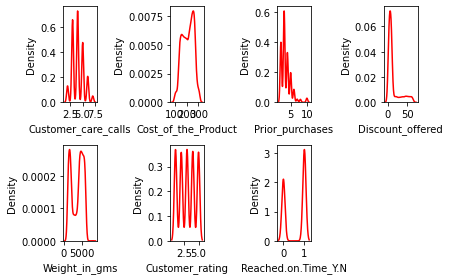

In [114]:
features = numericals
for i in range (0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout()

In [115]:
x = df['Customer_care_calls']
print('rata-rata: ',x.mean())
print('median: ',x.median())
print('modus: ',x.mode()[0])

rata-rata:  4.054459496317847
median:  4.0
modus:  4


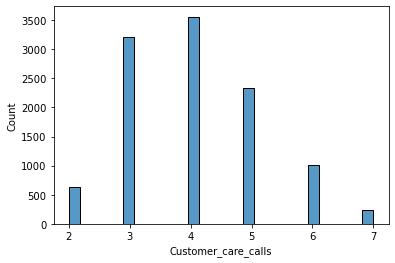

In [116]:
sns.histplot(df['Customer_care_calls'])
plt.show()

In [117]:
x = df['Cost_of_the_Product']
print('rata-rata: ',x.mean())
print('median: ',x.median())
print('modus: ',x.mode()[0])

rata-rata:  210.19683607600692
median:  214.0
modus:  245


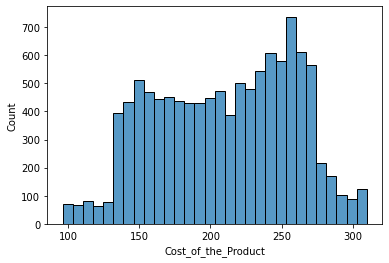

In [118]:
sns.histplot(df['Cost_of_the_Product'])
plt.show()

In [119]:
x = df['Prior_purchases']
print('rata-rata: ',x.mean())
print('median: ',x.median())
print('modus: ',x.mode()[0])

rata-rata:  3.5675970542776616
median:  3.0
modus:  3


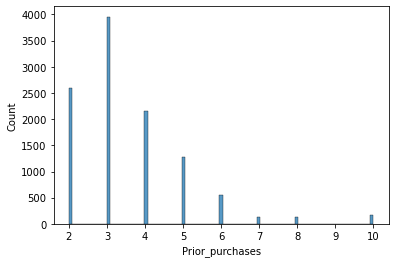

In [121]:
sns.histplot(df['Prior_purchases'])
plt.show()

In [80]:
x = df['Discount_offered']
print('rata-rata: ',x.mean())
print('median: ',x.median())
print('modus: ',x.mode()[0])

rata-rata:  13.37321574688608
median:  7.0
modus:  10


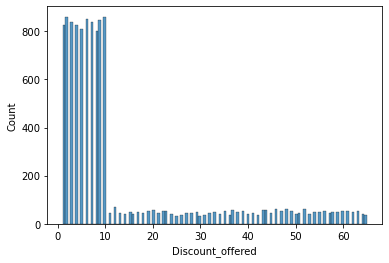

In [81]:
sns.histplot(df['Discount_offered'])
plt.show()

In [122]:
x = df['Weight_in_gms']
print('rata-rata: ',x.mean())
print('median: ',x.median())
print('modus: ',x.mode()[0])

rata-rata:  3634.016728793527
median:  4149.0
modus:  4883


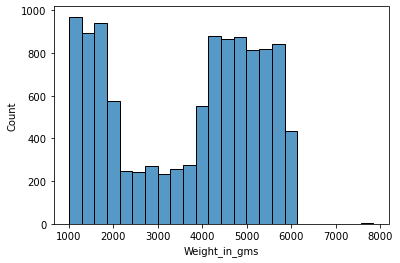

In [123]:
sns.histplot(df['Weight_in_gms'])
plt.show()

### Individual Countplot (Categorical)

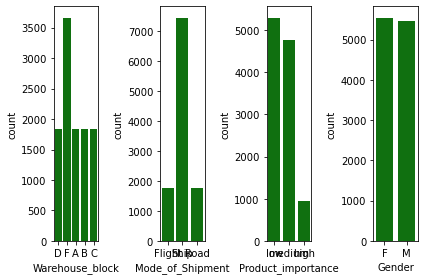

In [158]:
features = categoricals
for i in range(0, len(features)):
    ax = plt.subplot(1, 
                len(features),
                i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.tight_layout()

In [84]:
ctg_1 = df.groupby(['Warehouse_block','Reached.on.Time_Y.N']).agg({'ID': 'nunique'})
ctg_1

ID
Warehouse_block Reached.on.Time_Y.N      
A               0                     758
                1                    1075
B               0                     729
                1                    1104
C               0                     739
                1                    1094
D               0                     738
                1                    1096
F               0                    1472
                1                    2194

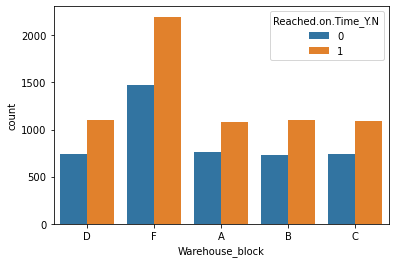

In [73]:
sns.countplot(x='Warehouse_block',
            hue='Reached.on.Time_Y.N',
            data=df);

In [85]:
ctg_2 = df.groupby(['Mode_of_Shipment','Reached.on.Time_Y.N']).agg({'ID': 'nunique'})
ctg_2

ID
Mode_of_Shipment Reached.on.Time_Y.N      
Flight           0                     708
                 1                    1069
Road             0                     725
                 1                    1035
Ship             0                    3003
                 1                    4459

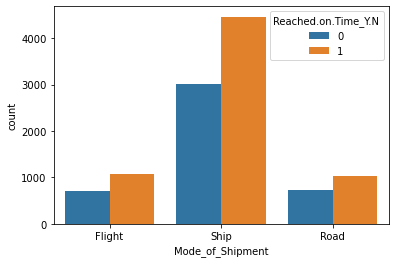

In [75]:
sns.countplot(x='Mode_of_Shipment',
            hue='Reached.on.Time_Y.N',
            data=df);

In [86]:
ctg_3 = df.groupby(['Product_importance','Reached.on.Time_Y.N']).agg({'ID': 'nunique'})
ctg_3

ID
Product_importance Reached.on.Time_Y.N      
high               0                     332
                   1                     616
low                0                    2157
                   1                    3140
medium             0                    1947
                   1                    2807

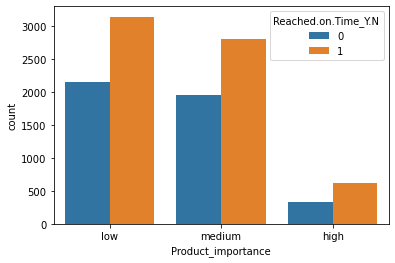

In [77]:
sns.countplot(x='Product_importance',
            hue='Reached.on.Time_Y.N',
            data=df);

In [87]:
ctg_4 = df.groupby(['Gender','Reached.on.Time_Y.N']).agg({'ID': 'nunique'})
ctg_4

ID
Gender Reached.on.Time_Y.N      
F      0                    2249
       1                    3296
M      0                    2187
       1                    3267

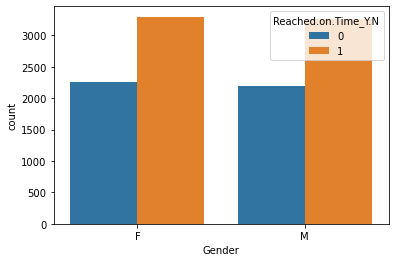

In [90]:
sns.countplot(x='Gender',
            hue='Reached.on.Time_Y.N',
            data=df);

### Correlation Heatmap

<AxesSubplot:>

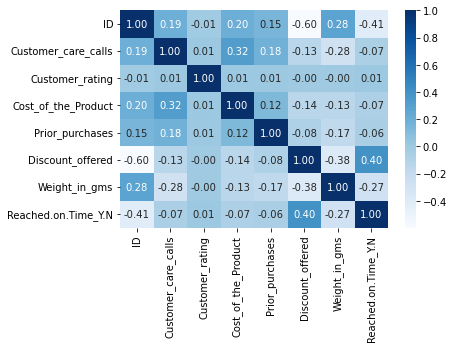

In [160]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')